In [1]:
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf

## Problem 1

Computational graph for the following expression
$$
f = f(x,y,z) = \frac{x}{y} + z^2 + σ(x)
$$
$$
x = -1, y = 2, z = 2
$$

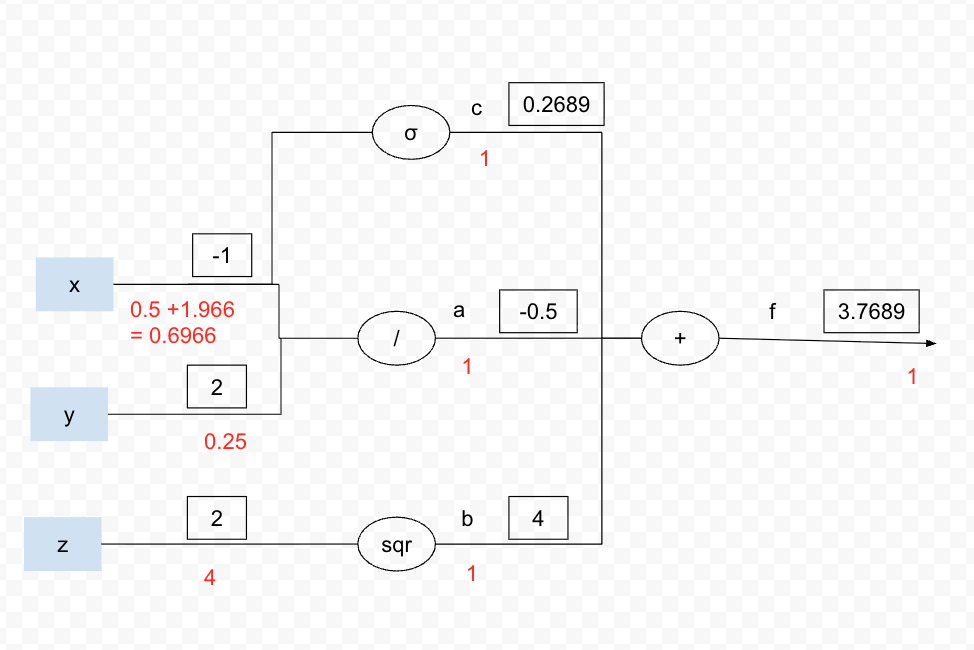

#### Forward Values:
$$
f = f(x,y,z) = \frac{x}{y} + z^2 + σ(x)
$$
$$
x = -1, y = 2, z = 2
$$
$$
Node \:a: \frac{x}{y} = \frac{-1}{2} = -0.5
$$
$$
Node \:b: Z^2 = 2^2 = 4
$$
$$
Node \:c: σ(x) = \frac{1}{1 + e^{-x}} = \frac{1}{1 + e^{--1}} = \frac{1}{1 + e} = \frac{1}{1 + 2.7183} = \frac{1}{3.7183} ≈ 0.2689
$$
$$
f = a + b + c ≈ -0.5 + 4 + 0.2689 ≈ 3.7689
$$

#### Backward Values:
$$
f = a + b + c
$$
$$
\frac{∂f}{∂a} = 1, \frac{∂f}{∂b} = 1, \frac{∂f}{∂c} = 1
$$

$$
a = \frac{x}{y}
$$
$$
\frac{∂f}{∂x}(from \:a) = \frac{∂f}{∂a} . \frac{∂a}{∂x}
$$
$$
\frac{∂a}{∂x} = \frac{∂}{∂x}(\frac{x}{y}) = \frac{1}{y} = \frac{1}{2} = 0.5
$$
$$
\therefore \frac{∂f}{∂x}(from \:a) = 1 * 0.5 = 0.5
$$

$$
\frac{∂f}{∂y}(from \:a) = \frac{∂f}{∂a} . \frac{∂a}{∂y}
$$
$$
\frac{∂a}{∂y} = \frac{∂}{∂y}(\frac{x}{y}) = \frac{-x}{y^2} = \frac{--1}{2^2} = \frac{1}{4} = 0.25
$$
$$
\therefore \frac{∂f}{∂y}(from \:a) = 1 * 0.25 = 0.25
$$

$$
b = z^2
$$
$$
\frac{∂f}{∂z} = \frac{∂f}{∂z} . \frac{∂b}{∂z}
$$
$$
\frac{∂b}{∂z} = \frac{∂}{∂z}(z^2) = 2Z = 2*2 = 4
$$
$$
\therefore \frac{∂f}{∂z} = 1 * 4 = 4
$$

$$
c = σ(x) = 0.2689
$$
$$
\frac{∂f}{∂x}(from \:c) = \frac{∂f}{∂x} . \frac{∂c}{∂x}
$$
$$
\frac{∂c}{∂x} = \frac{∂}{∂x}(σ(x)) = (1 - σ(x))σ(x) ≈ (1 - 0.2689)0.2689 ≈ 0.1966
$$
$$
\therefore \frac{∂f}{∂x}(from \:c) ≈ 1 * 0.1966 ≈ 0.1966
$$

#### Final Values:

Forward Propagation:

x = -1, y = 2, z = 2

a = -0.5, b = 4, c = 0.2689

f = 3.76899

Backward Propagation:

a = 1, b = 1, c = 1

∂f/∂x ≈ 0.5 + 0.1966 ≈ 0.6966

∂f/∂y = 0.25

∂f/∂z = 4

## Problem 2

In [2]:
# f(x, y, z) = x/y + z^2 + σ(x)
x = tf.constant(-1.0)
y = tf.constant(2.0)
z = tf.constant(2.0)

with tf.GradientTape() as tape:
    tape.watch([x, y, z])
    f = x / y + tf.square(z) + tf.sigmoid(x)
    
df_dx, df_dy, df_dz = tape.gradient(f, [x, y, z])

print("f(x,y,z) = ", f.numpy())
print("∂f/∂x = ", df_dx.numpy())
print("∂f/∂y = ", df_dy.numpy())
print("∂f/∂z = ", df_dz.numpy())

f(x,y,z) =  3.7689414
∂f/∂x =  0.69661194
∂f/∂y =  0.25
∂f/∂z =  4.0


Conclusion:
The values of the partial derivatives computed with tf.GradientTape() are the as the ones obtained in problem 1.

## Problem 3

In [10]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0,3], cov=[[1, 0.5], [0.5, 1]], size=num_samples_per_class,
)
positive_samples = np.random.multivariate_normal(
    mean=[3,0], cov=[[1, 0.5], [0.5, 1]], size=num_samples_per_class,
)

In [11]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
targets = np.vstack((
    np.zeros((num_samples_per_class, 1), dtype='float32'),
    np.ones((num_samples_per_class, 1), dtype='float32')
))

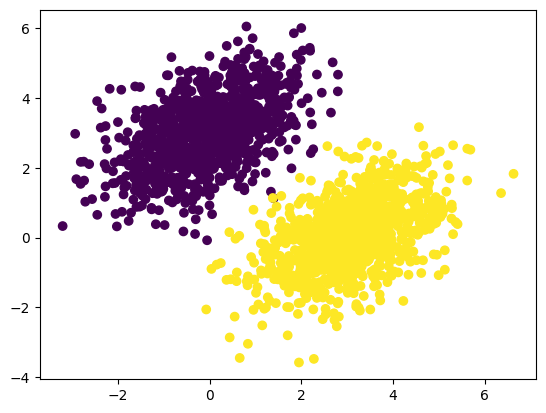

In [17]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [12]:
input_dim = 2
output_dim = 1

W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [13]:
def model(inputs):
    # prediction = [[w1], [w2]] • [x, y] + b = w1 * x+ w2 * y + b
    return tf.matmul(inputs, W) + b

In [14]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [15]:
def training_step(inputs, targets):
    learning_rate = 0.1
    with tf.GradientTape() as tape:
        predictions = model(inputs) # forward pass
        loss = square_loss(predictions, targets)
        
    # find gradients of loss with respect to W and b
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss,[W, b])
    
    # Update W and b by descending against the gradient
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [16]:
# For simplicity, we do batch training instead of mini-batch training. We run each training
# step (gradient computation and weight update) on the entire data, rather than iterate
# over the data in small batches.
for step in range(35):
    loss = training_step(inputs, targets)
    print('Loss at step %d: %.4f' % (step, loss))

Loss at step 0: 3.9714
Loss at step 1: 0.3863
Loss at step 2: 0.1574
Loss at step 3: 0.1184
Loss at step 4: 0.1064
Loss at step 5: 0.0988
Loss at step 6: 0.0924
Loss at step 7: 0.0866
Loss at step 8: 0.0813
Loss at step 9: 0.0764
Loss at step 10: 0.0720
Loss at step 11: 0.0679
Loss at step 12: 0.0642
Loss at step 13: 0.0608
Loss at step 14: 0.0578
Loss at step 15: 0.0549
Loss at step 16: 0.0524
Loss at step 17: 0.0500
Loss at step 18: 0.0478
Loss at step 19: 0.0459
Loss at step 20: 0.0441
Loss at step 21: 0.0424
Loss at step 22: 0.0409
Loss at step 23: 0.0396
Loss at step 24: 0.0383
Loss at step 25: 0.0372
Loss at step 26: 0.0361
Loss at step 27: 0.0352
Loss at step 28: 0.0343
Loss at step 29: 0.0335
Loss at step 30: 0.0328
Loss at step 31: 0.0321
Loss at step 32: 0.0315
Loss at step 33: 0.0309
Loss at step 34: 0.0304


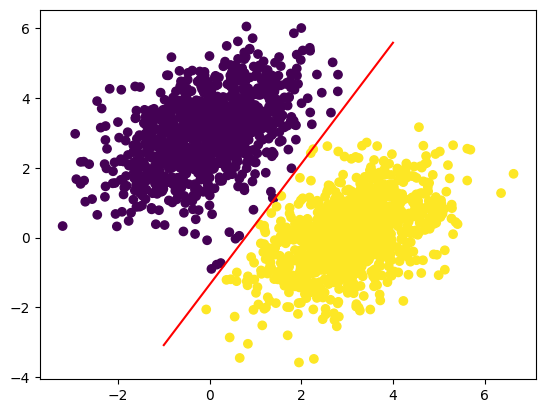

In [18]:
# # plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
# colors = np.array(['green', 'red'])[targets[:, 0].astype(int)]
# plt.scatter(inputs[:, 0], inputs[:, 1], c=colors)
# plt.show()

# Display predictions and decision boundary
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
x = np.linspace(-1, 4, 100)
y = -W[0] / W[1]* x + (0.5 - b) / W[1]
plt.plot(x, y, 'r')
plt.show()